In [11]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import scipy.sparse as sp
from scipy.stats import wasserstein_distance
from scipy.stats import energy_distance

from pathlib import Path

In [12]:
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt 
matplotlib.rcdefaults()

matplotlib_rc = { 
    # 'text': {'usetex': True}, 
    'font': {'family': 'serif'} } # Apply changes for k, v in matplotlib_rc.items(): rc(k, **v)
for k, v in matplotlib_rc.items():
          rc(k, **v)

In [13]:
def update_dict(d, upt):
    for k in upt:
        if k not in d:
            d[k] = []
        d[k].append(upt[k])
    return d

In [14]:
warnings.filterwarnings('ignore')

In [15]:
def plot_sparsity_histograms(adata_generated, adata_real, folder, dataset_name, xlim=None, bins=30):
    """
    Plots histograms of gene expression sparsity for real and generated datasets.
    
    Parameters:
    adata_generated (dict): Dictionary where keys are model names and values are generated anndata objects.
    adata_real (anndata.AnnData): AnnData object of the real dataset.
    """
    save_path = Path(folder)
    # Compute sparsity for the real dataset
    sparsity_real = (adata_real.X.A == 0).sum(1)
    print(sparsity_real.shape)
    sparsity_real_df = {'Number of zeroes per cell': list(sparsity_real),
                                     'Model': ['Real data' for _ in range(len(sparsity_real))]}
    
    # Compute sparsity for each generated dataset
    wass = {}
    for model_name, adata in adata_generated.items():
        if sp.issparse(adata.X):
            sparsity_generated = (adata.X.A == 0).sum(1)
        else:
            sparsity_generated = (adata.X == 0).sum(1)
        print(sparsity_generated.shape)
        sparsity_real_df['Number of zeroes per cell'] += list(sparsity_generated)
        sparsity_real_df['Model'] += [model_name for _ in range(len(sparsity_generated))]
        print(f"Wasserstein distance true/generated {model_name}: {wasserstein_distance(sparsity_generated, sparsity_real)}")
        print(f"Energy distance true/generated {model_name}: {energy_distance(sparsity_generated, sparsity_real)}")
        wass[model_name] = wasserstein_distance(sparsity_generated, sparsity_real)
    
    # Plotting
    plt.figure(figsize=(3, 3))
    # hist = sns.histplot(data=sparsity_real_df, x='Number of zeroes per cell', hue='Model', kde=True, alpha=0.2, 
    #             palette="colorblind", bins=bins, stat="count", legend=True, line_kws={"linewidth": 2}, fill=True)

    kde = sns.kdeplot(data=sparsity_real_df, x='Number of zeroes per cell', hue='Model', alpha=0.2, 
                palette="colorblind", legend=False, fill=True, linewidth=2)
    
    plt.ylabel("Frequency")
    plt.title(dataset_name)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.savefig(save_path / (dataset_name+".png"), format='png', dpi=800)
    plt.show()

    return wass

In [16]:
folder = "/home/icb/alessandro.palma/environment/cfgen/figs/sparsity"

## Dentategyrus

(3600,)
(3600,)
Wasserstein distance true/generated CFGen: 105.13777777777779
Energy distance true/generated CFGen: 2.8828580747259043
(3600,)
Wasserstein distance true/generated scDiffusion: 1533.4005555555555
Energy distance true/generated scDiffusion: 42.12369000051229
(3600,)
Wasserstein distance true/generated scGAN: 528.0969444444445
Energy distance true/generated scGAN: 18.042675512808348
(3600,)
Wasserstein distance true/generated scVI: 34.275277777777774
Energy distance true/generated scVI: 1.1114516839156852


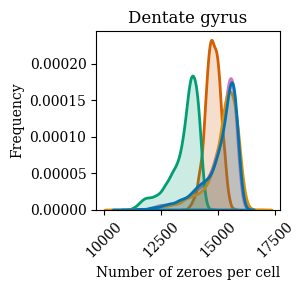

(3600,)
(3600,)
Wasserstein distance true/generated CFGen: 104.60083333333336
Energy distance true/generated CFGen: 2.8105438876567015
(3600,)
Wasserstein distance true/generated scDiffusion: 1533.4005555555555
Energy distance true/generated scDiffusion: 42.12369000051229
(3600,)
Wasserstein distance true/generated scGAN: 529.8502777777778
Energy distance true/generated scGAN: 18.073238353952107
(3600,)
Wasserstein distance true/generated scVI: 20.365833333333335
Energy distance true/generated scVI: 0.6138143494213504


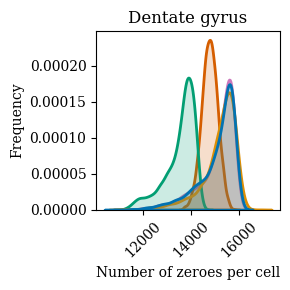

(3600,)
(3600,)
Wasserstein distance true/generated CFGen: 96.37027777777777
Energy distance true/generated CFGen: 2.592463644280008
(3600,)
Wasserstein distance true/generated scDiffusion: 1533.4005555555555
Energy distance true/generated scDiffusion: 42.12369000051229
(3600,)
Wasserstein distance true/generated scGAN: 527.0786111111112
Energy distance true/generated scGAN: 17.97780515637937
(3600,)
Wasserstein distance true/generated scVI: 27.67333333333334
Energy distance true/generated scVI: 0.8609858331809367


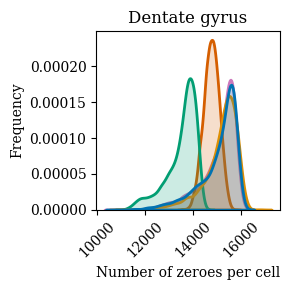

In [17]:
wasserstein_dent = {}
for i in range(3):
    adata_celldreamer_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/dentategyrus/generated_cells_{i}.h5ad")
    adata_scDiff_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scDiffusion/generated/dentategyrus/generated_cells_{i}.h5ad")
    adata_scgan_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scgan/model_runs/dentategyrus/dentategyrus_generated_{i}.h5ad")
    adata_scvi_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/dentategyrus/generated/dentategyrus_{i}.h5ad")
    adata_real_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/dentategyrus/dentategyrus_test.h5ad")

    adata_scDiff_dent = adata_scDiff_dent[:len(adata_celldreamer_dent)]
    adata_scgan_dent = adata_scgan_dent[:len(adata_celldreamer_dent)]
    adata_real_dent = adata_real_dent[:len(adata_celldreamer_dent)]
    adata_scvi_dent = adata_scvi_dent[:len(adata_celldreamer_dent)]

    wass = plot_sparsity_histograms({"CFGen": adata_celldreamer_dent, "scDiffusion": adata_scDiff_dent, "scGAN":adata_scgan_dent, "scVI": adata_scvi_dent}, 
                            adata_real_dent, folder=folder, dataset_name="Dentate gyrus", bins=20)

    wasserstein_dent = update_dict(wasserstein_dent, wass)
    # plot_sparsity_histograms({"CFGen": adata_celldreamer_dent, "scDiffusion": adata_scDiff_dent, "scGAN":adata_scgan_dent}, 
    #                         adata_real_dent, folder=folder, dataset_name="Dentate gyrus", bins=20)

In [18]:
for w in wasserstein_dent:
    print(w)
    print(np.mean(wasserstein_dent[w]))
    print(np.std(wasserstein_dent[w])/np.sqrt(3))

CFGen
102.03629629629631
2.3166020002126264
scDiffusion
1533.4005555555552
1.3127425272378465e-13
scGAN
528.3419444444445
0.6609005266852447
scVI
27.438148148148148
3.279893129755213


In [28]:
wasserstein_dent

{'CFGen': [105.13777777777779, 104.60083333333336, 96.37027777777777],
 'scDiffusion': [1533.4005555555555, 1533.4005555555555, 1533.4005555555555],
 'scGAN': [528.0969444444445, 529.8502777777778, 527.0786111111112],
 'scVI': [34.275277777777774, 20.365833333333335, 27.67333333333334]}

## C. Elegans

(17941,)
(18000,)
Wasserstein distance true/generated cellFlow: 55.67144023310976
Energy distance true/generated cellFlow: 2.348777398440835
(19636,)
Wasserstein distance true/generated scDiffusion: 466.67528075405806
Energy distance true/generated scDiffusion: 18.103887666553128
(17934,)
Wasserstein distance true/generated scGAN: 537.4769915884841
Energy distance true/generated scGAN: 19.56898429282847
(17941,)
Wasserstein distance true/generated scVI: 93.12713895546514
Energy distance true/generated scVI: 3.11021353338957


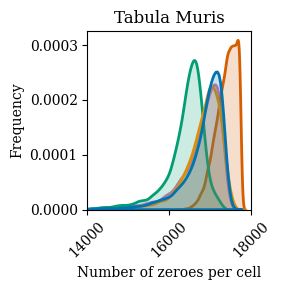

(17941,)
(18000,)
Wasserstein distance true/generated cellFlow: 63.14582331902719
Energy distance true/generated cellFlow: 2.715783595626021
(39272,)
Wasserstein distance true/generated scDiffusion: 466.758885502444
Energy distance true/generated scDiffusion: 18.104976797001047
(17934,)
Wasserstein distance true/generated scGAN: 532.4811178291443
Energy distance true/generated scGAN: 19.29626716403209
(17941,)
Wasserstein distance true/generated scVI: 91.8666183601806
Energy distance true/generated scVI: 3.1787805661342383


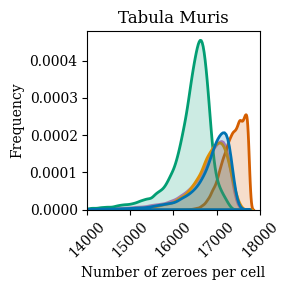

(17941,)
(18000,)
Wasserstein distance true/generated cellFlow: 60.06567106379553
Energy distance true/generated cellFlow: 2.601284236996083
(58908,)
Wasserstein distance true/generated scDiffusion: 466.636597083587
Energy distance true/generated scDiffusion: 18.096835895557952
(17934,)
Wasserstein distance true/generated scGAN: 539.2962176395603
Energy distance true/generated scGAN: 19.60600721185228
(17941,)
Wasserstein distance true/generated scVI: 88.66518031324898
Energy distance true/generated scVI: 3.104280350961883


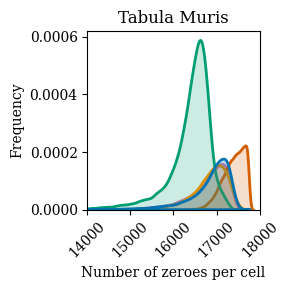

In [19]:
wasserstein_tab = {}
for i in range(3):
    adata_celldreamer_c_elegans = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/c_elegans/generated_cells_{i}.h5ad")
    adata_scDiff_c_elegans = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scDiffusion/generated/c_elegans/generated_cells_{i}.h5ad")
    adata_scgan_c_elegans = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scgan/model_runs/c_elegans/c_elegans_generated_{i}.h5ad")
    adata_scvi_c_elegans = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/c_elegans/generated/c_elegans_{i}.h5ad")
    adata_real_c_elegans = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/c_elegans/c_elegans_test.h5ad")

    wass = plot_sparsity_histograms({"cellFlow": adata_celldreamer_c_elegans, "scDiffusion": adata_scDiff_c_elegans, "scGAN":adata_scgan_c_elegans, "scVI": adata_scvi_c_elegans}, 
                        adata_real_c_elegans, folder=folder, dataset_name="Tabula Muris", xlim=(14000, 18000))
    # plot_sparsity_histograms({"cellFlow": adata_celldreamer_c_elegans, "scDiffusion": adata_scDiff_c_elegans, "scGAN":adata_scgan_c_elegans}, 
    #                     adata_real_c_elegans, folder=folder, dataset_name="Tabula Muris", xlim=(14000, 18000))

    wasserstein_tab = update_dict(wasserstein_tab, wass)

In [20]:
for w in wasserstein_tab:
    print(w)
    print(np.mean(wasserstein_tab[w]))
    print(np.std(wasserstein_tab[w])/np.sqrt(3))

cellFlow
59.62764487197749
1.770781424324745
scDiffusion
466.6902544466964
0.02946475465160351
scGAN
536.4181090190629
1.6634850016590685
scVI
91.21964587629823
1.0843532406603333


In [29]:
wasserstein_tab

{'cellFlow': [55.67144023310976, 63.14582331902719, 60.06567106379553],
 'scDiffusion': [466.67528075405806, 466.758885502444, 466.636597083587],
 'scGAN': [537.4769915884841, 532.4811178291443, 539.2962176395603],
 'scVI': [93.12713895546514, 91.8666183601806, 88.66518031324898]}

## PBMC3K

(528,)
(528,)
Wasserstein distance true/generated cellFlow: 108.23484848484848
Energy distance true/generated cellFlow: 5.488071681850007
(528,)
Wasserstein distance true/generated scDiffusion: 1752.0776515151515
Energy distance true/generated scDiffusion: 51.362068322695265
(527,)
Wasserstein distance true/generated scGAN: 205.73675679949395
Energy distance true/generated scGAN: 10.994453192501442
(528,)
Wasserstein distance true/generated scVI: 38.33143939393939
Energy distance true/generated scVI: 1.837537050718707


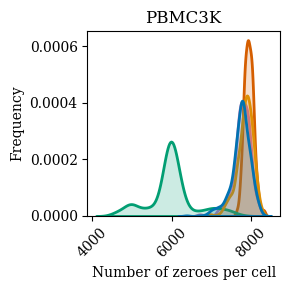

(528,)
(528,)
Wasserstein distance true/generated cellFlow: 129.7310606060606
Energy distance true/generated cellFlow: 6.477135387521465
(1056,)
Wasserstein distance true/generated scDiffusion: 1739.649621212121
Energy distance true/generated scDiffusion: 51.33778023675432
(527,)
Wasserstein distance true/generated scGAN: 193.8529878960382
Energy distance true/generated scGAN: 10.398187137463752
(528,)
Wasserstein distance true/generated scVI: 40.382575757575765
Energy distance true/generated scVI: 1.9302727032487546


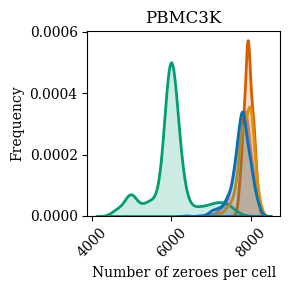

(528,)
(528,)
Wasserstein distance true/generated cellFlow: 113.07765151515152
Energy distance true/generated cellFlow: 5.685075455223846
(1584,)
Wasserstein distance true/generated scDiffusion: 1728.7095959595958
Energy distance true/generated scDiffusion: 51.079501369503674
(527,)
Wasserstein distance true/generated scGAN: 202.7516783106204
Energy distance true/generated scGAN: 10.879444346243188
(528,)
Wasserstein distance true/generated scVI: 28.22348484848485
Energy distance true/generated scVI: 1.4039597844015024


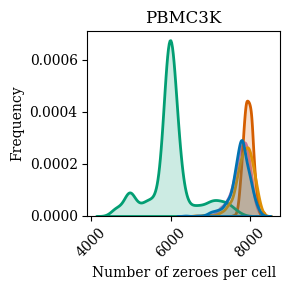

In [21]:
wasserstein_pbmc = {}
for i in range(3):
    adata_celldreamer_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/pbmc3k/generated_cells_{i}.h5ad")
    adata_scDiff_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scDiffusion/generated/pbmc3k/generated_cells_{i}.h5ad")
    adata_scgan_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scgan/model_runs/pbmc3k/pbmc3k_generated_{i}.h5ad")
    adata_scvi_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/pbmc3k/generated/pbmc3k_{i}.h5ad")
    adata_real_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/pbmc3k/pbmc3k_test.h5ad")

    wass = plot_sparsity_histograms({"cellFlow": adata_celldreamer_pbmc3k, "scDiffusion": adata_scDiff_pbmc3k, "scGAN":adata_scgan_pbmc3k, "scVI": adata_scvi_pbmc3k}, 
                            adata_real_pbmc3k, folder=folder, dataset_name="PBMC3K", bins=20)
    # plot_sparsity_histograms({"cellFlow": adata_celldreamer_pbmc3k, "scDiffusion": adata_scDiff_pbmc3k, "scGAN":adata_scgan_pbmc3k}, 
    #                         adata_real_pbmc3k, folder=folder, dataset_name="PBMC3K", bins=20)
    wasserstein_pbmc = update_dict(wasserstein_pbmc, wass)

In [22]:
for w in wasserstein_pbmc:
    print(w)
    print(np.mean(wasserstein_pbmc[w]))
    print(np.std(wasserstein_pbmc[w])/np.sqrt(3))

cellFlow
117.0145202020202
5.315511581594047
scDiffusion
1740.1456228956229
5.511624450285079
scGAN
200.78047433538418
2.9143409650163434
scVI
35.645833333333336
3.068486158368916


In [30]:
wasserstein_pbmc

{'cellFlow': [108.23484848484848,
  129.7310606060606,
  113.07765151515152,
  37.18390276392033,
  38.56083816309284],
 'scDiffusion': [1752.0776515151515,
  1739.649621212121,
  1728.7095959595958,
  3215.3906883120076,
  3214.4007968340306],
 'scGAN': [205.73675679949395,
  193.8529878960382,
  202.7516783106204,
  1395.8194360153518,
  1397.3189103249024],
 'scVI': [38.33143939393939,
  40.382575757575765,
  28.22348484848485,
  106.28237697561309,
  109.28677055107745]}

## HLCA CORE

(116989,)
(116000,)
Wasserstein distance true/generated cellFlow: 37.18390276392033
Energy distance true/generated cellFlow: 0.8576676111271879
(129211,)
Wasserstein distance true/generated scDiffusion: 3215.3906883120076
Energy distance true/generated scDiffusion: 57.04121600255933
(116989,)
Wasserstein distance true/generated scGAN: 1395.8194360153518
Energy distance true/generated scGAN: 33.111198472792665
(116989,)
Wasserstein distance true/generated scVI: 106.28237697561309
Energy distance true/generated scVI: 2.32357301547809


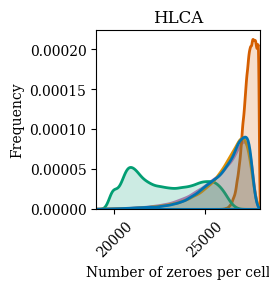

(116989,)
(116000,)
Wasserstein distance true/generated cellFlow: 38.56083816309284
Energy distance true/generated cellFlow: 0.8706461776730384
(258422,)
Wasserstein distance true/generated scDiffusion: 3214.4007968340306
Energy distance true/generated scDiffusion: 57.026458723087856
(116989,)
Wasserstein distance true/generated scGAN: 1397.3189103249024
Energy distance true/generated scGAN: 33.166865499158085
(116989,)
Wasserstein distance true/generated scVI: 109.28677055107745
Energy distance true/generated scVI: 2.4027191409052353


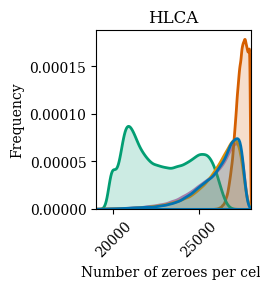

In [23]:
wasserstein_hlca = {}
for i in range(2):
    adata_celldreamer_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/hlca_core/generated_cells_{i}.h5ad")
    adata_scDiff_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scDiffusion/generated/hlca_core/generated_cells_{i}.h5ad")
    adata_scgan_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scgan/model_runs/hlca_core/hlca_core_generated_{i}.h5ad")
    adata_scvi_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/hlca_core/generated/hlca_core_{i}.h5ad")
    adata_real_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/hlca_core/hlca_core_test.h5ad")
    
    wass = plot_sparsity_histograms({"cellFlow": adata_celldreamer_hlca, "scDiffusion": adata_scDiff_hlca, "scGAN":adata_scgan_hlca, "scVI": adata_scvi_hlca}, 
                        adata_real_hlca, folder=folder, dataset_name="HLCA", xlim=(19000, 28000))
    # plot_sparsity_histograms({"cellFlow": adata_celldreamer_hlca, "scDiffusion": adata_scDiff_hlca, "scGAN":adata_scgan_hlca}, 
    #                     adata_real_hlca, folder=folder, dataset_name="HLCA", xlim=(19000, 28000))
    wasserstein_hlca = update_dict(wasserstein_pbmc, wass)

In [27]:
for w in wasserstein_hlca:
    print(w)
    print(np.mean(wasserstein_hlca[w]))
    print(np.std(wasserstein_hlca[w])/np.sqrt(2))

cellFlow
37.872370463506584
0.48682017900534363
scDiffusion
3214.895742573019
0.34997948835812903
scGAN
1396.5691731701272
0.5301442262491151
scVI
107.78457376334526
1.062213535282074


In [31]:
wasserstein_hlca

{'cellFlow': [37.18390276392033, 38.56083816309284],
 'scDiffusion': [3215.3906883120076, 3214.4007968340306],
 'scGAN': [1395.8194360153518, 1397.3189103249024],
 'scVI': [106.28237697561309, 109.28677055107745]}

In [10]:
# adata_celldreamer_hlca.var = adata_real_hlca.var.copy()
# adata_scDiff_hlca.var = adata_real_hlca.var.copy()

In [ ]:
# sc.pp.highly_variable_genes(adata_real_hlca, n_top_genes=15000, subset=True)

In [ ]:
# adata_scDiff_hlca = adata_scDiff_hlca[:, adata_real_hlca.var.index]
# adata_celldreamer_hlca = adata_celldreamer_hlca[:, adata_real_hlca.var.index]

In [11]:
folder = "/home/icb/alessandro.palma/environment/cfgen/figs/sparsity/scvi"

## Tabula Muris

In [12]:
adata_celldreamer_tabula_muris = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/tabula_muris/generated_cells_0.h5ad")
adata_scDiff_tabula_muris = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scDiffusion/generated/tabula_muris/generated_cells_0.h5ad")
adata_scgan_tabula_muris = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scgan/model_runs/tabula_muris/tabula_muris_generated_0.h5ad")
adata_scvi_tabula_muris = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/tabula_muris/generated/tabula_muris_0.h5ad")
adata_real_tabula_muris = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/tabula_muris/tabula_muris_test.h5ad")

(49078,)
(49000,)
Wasserstein distance true/generated cellFlow: 72.95773581246347
Energy distance true/generated cellFlow: 2.459325562888129
(110560,)
Wasserstein distance true/generated scDiffusion: 2083.1221825232983
Energy distance true/generated scDiffusion: 45.02554868432782
(49064,)
Wasserstein distance true/generated scGAN: 1637.9154148437178
Energy distance true/generated scGAN: 43.09105694938842
(49078,)
Wasserstein distance true/generated scVI: 146.14809079424592
Energy distance true/generated scVI: 3.0424668528106587


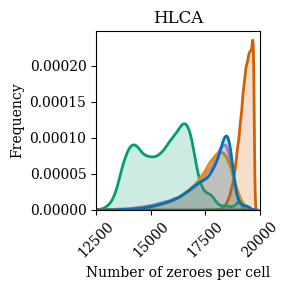

In [13]:
plot_sparsity_histograms({"cellFlow": adata_celldreamer_tabula_muris, "scDiffusion": adata_scDiff_tabula_muris, "scGAN":adata_scgan_tabula_muris, "scVI": adata_scvi_tabula_muris}, 
                        adata_real_tabula_muris, folder=folder, dataset_name="HLCA", xlim=(12500, 20000))

# Replot only scVI and CFGen

## Dentategyrus

In [14]:
# sparsity_dent_small = pd.DataFrame(plot_sparsity_histograms({"cellFlow": adata_celldreamer_dent, "scVI": adata_scvi_dent}, 
#                         adata_real_dent, folder=folder, dataset_name="Dentate gyrus", bins=20))

In [ ]:
# scvi_dent = sparsity_dent_small.loc[sparsity_dent_small.Model=="scVI", "Number of zeroes per cell"].dropna()
# cfgen_dent = sparsity_dent_small.loc[sparsity_dent_small.Model=="cellFlow", "Number of zeroes per cell"].dropna()
# real_dent = sparsity_dent_small.loc[sparsity_dent_small.Model=="Real data", "Number of zeroes per cell"].dropna()

# print("Wasserstein distance scVI", wasserstein_distance(scvi_dent, real_dent))
# print("Energy distance scVI", energy_distance(scvi_dent, real_dent))
# print("Wasserstein distance CFGen", wasserstein_distance(cfgen_dent, real_dent))
# print("Energy CFGen", energy_distance(cfgen_dent, real_dent))

## PBMC3k

In [ ]:
# sparsity_pbmc_small = pd.DataFrame(plot_sparsity_histograms({"cellFlow": adata_celldreamer_pbmc3k,  "scVI": adata_scvi_pbmc3k}, 
#                         adata_real_pbmc3k, folder=folder, dataset_name="PBMC3K", bins=20))

In [ ]:
# scvi_pbmc = sparsity_pbmc_small.loc[sparsity_pbmc_small.Model=="scVI", "Number of zeroes per cell"].dropna()
# cfgen_pbmc = sparsity_pbmc_small.loc[sparsity_pbmc_small.Model=="cellFlow", "Number of zeroes per cell"].dropna()
# real_pbmc = sparsity_pbmc_small.loc[sparsity_pbmc_small.Model=="Real data", "Number of zeroes per cell"].dropna()

# print("Wasserstein distance scVI", wasserstein_distance(scvi_pbmc, real_pbmc))
# print("Energy distance scVI", energy_distance(scvi_pbmc, real_pbmc))
# print("Wasserstein distance CFGen", wasserstein_distance(cfgen_pbmc, real_pbmc))
# print("Energy CFGen", energy_distance(cfgen_pbmc, real_pbmc))

## Tabula Muris

In [24]:
# sparsity_tabula_small = pd.DataFrame(plot_sparsity_histograms({"cellFlow": adata_celldreamer_c_elegans, "scVI": adata_scvi_c_elegans}, 
#                             adata_real_c_elegans, folder=folder, dataset_name="Tabula Muris", xlim=(14000, 18000)))

In [25]:
# scvi_tabula = sparsity_tabula_small.loc[sparsity_tabula_small.Model=="scVI", "Number of zeroes per cell"].dropna()
# cfgen_tabula = sparsity_tabula_small.loc[sparsity_tabula_small.Model=="cellFlow", "Number of zeroes per cell"].dropna()
# real_tabula = sparsity_tabula_small.loc[sparsity_tabula_small.Model=="Real data", "Number of zeroes per cell"].dropna()

# print("Wasserstein distance scVI", wasserstein_distance(scvi_tabula, real_tabula))
# print("Energy distance scVI", energy_distance(scvi_tabula, real_tabula))
# print("Wasserstein distance CFGen", wasserstein_distance(cfgen_tabula, real_tabula))
# print("Energy CFGen", energy_distance(cfgen_tabula, real_tabula))

## HLCA

In [26]:
# sparsity_hlca_small = pd.DataFrame(plot_sparsity_histograms({"cellFlow": adata_celldreamer_hlca, "scVI": adata_scvi_hlca}, 
#                         adata_real_hlca, folder=folder, dataset_name="HLCA", xlim=(19000, 28000)))

In [7]:
# scvi_hlca = sparsity_hlca_small.loc[sparsity_hlca_small.Model=="scVI", "Number of zeroes per cell"].dropna()
# cfgen_hlca = sparsity_hlca_small.loc[sparsity_hlca_small.Model=="cellFlow", "Number of zeroes per cell"].dropna()
# real_hlca = sparsity_hlca_small.loc[sparsity_hlca_small.Model=="Real data", "Number of zeroes per cell"].dropna()

# print("Wasserstein distance scVI", wasserstein_distance(scvi_hlca, real_hlca))
# print("Energy distance scVI", energy_distance(scvi_hlca, real_hlca))
# print("Wasserstein distance CFGen", wasserstein_distance(cfgen_hlca, real_hlca))
# print("Energy CFGen", energy_distance(cfgen_hlca, real_hlca))

In [15]:
# adata_celldreamer_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/dentategyrus/generated_cells_0.h5ad")
# adata_scvi_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/dentategyrus/generated/dentategyrus_0.h5ad")
# adata_real_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/dentategyrus/dentategyrus_test.h5ad")

# adata_real_dent = adata_real_dent[:len(adata_celldreamer_dent)]
# adata_scvi_dent = adata_scvi_dent[:len(adata_celldreamer_dent)]

# plot_sparsity_histograms({"CFGen": adata_celldreamer_dent, "scDiffusion": adata_scDiff_dent, "scGAN":adata_scgan_dent, "scVI": adata_scvi_dent}, 
#                         adata_real_dent, folder=folder, dataset_name="Dentate gyrus", bins=20)
# plot_sparsity_histograms({"CFGen":adata_scvi_dent, "scVI":adata_celldreamer_dent}, 
#                         adata_real_dent, folder=folder, dataset_name="Dentate gyrus", bins=20)

In [16]:
# adata_celldreamer_c_elegans = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/c_elegans/generated_cells_0.h5ad")
# adata_scvi_c_elegans = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/c_elegans/generated/c_elegans_0.h5ad")
# adata_real_c_elegans = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/c_elegans/c_elegans_test.h5ad")

# plot_sparsity_histograms({"cellFlow": adata_celldreamer_c_elegans, "scDiffusion": adata_scDiff_c_elegans, "scGAN":adata_scgan_c_elegans, "scVI": adata_scvi_c_elegans}, 
#                     adata_real_c_elegans, folder=folder, dataset_name="Tabula Muris", xlim=(14000, 18000))
# plot_sparsity_histograms({"cellFlow": adata_celldreamer_c_elegans, "scVI": adata_scvi_c_elegans}, 
#                     adata_real_c_elegans, folder=folder, dataset_name="Tabula Muris", xlim=(14000, 18000))

In [17]:
# adata_celldreamer_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/hlca_core/generated_cells_0.h5ad")
# adata_scvi_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/hlca_core/generated/hlca_core_0.h5ad")
# adata_real_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/hlca_core/hlca_core_test.h5ad")

# plot_sparsity_histograms({"cellFlow": adata_celldreamer_hlca, "scDiffusion": adata_scDiff_hlca, "scGAN":adata_scgan_hlca, "scVI": adata_scvi_hlca}, 
#                     adata_real_hlca, folder=folder, dataset_name="HLCA", xlim=(19000, 28000))
# plot_sparsity_histograms({"cellFlow": adata_celldreamer_hlca, "scVI": adata_scvi_hlca}, 
#                     adata_real_hlca, folder=folder, dataset_name="HLCA", xlim=(19000, 28000))

In [18]:
# adata_celldreamer_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/pbmc3k/generated_cells_0.h5ad")
# adata_scvi_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/pbmc3k/generated/pbmc3k_0.h5ad")
# adata_real_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/pbmc3k/pbmc3k_test.h5ad")

# plot_sparsity_histograms({"cellFlow": adata_celldreamer_pbmc3k, "scDiffusion": adata_scDiff_pbmc3k, "scGAN":adata_scgan_pbmc3k, "scVI": adata_scvi_pbmc3k}, 
#                         adata_real_pbmc3k, folder=folder, dataset_name="PBMC3K", bins=20)
# plot_sparsity_histograms({"cellFlow": adata_celldreamer_pbmc3k, "scVI":adata_scvi_pbmc3k}, 
                        # adata_real_pbmc3k, folder=folder, dataset_name="PBMC3K", bins=20)